--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



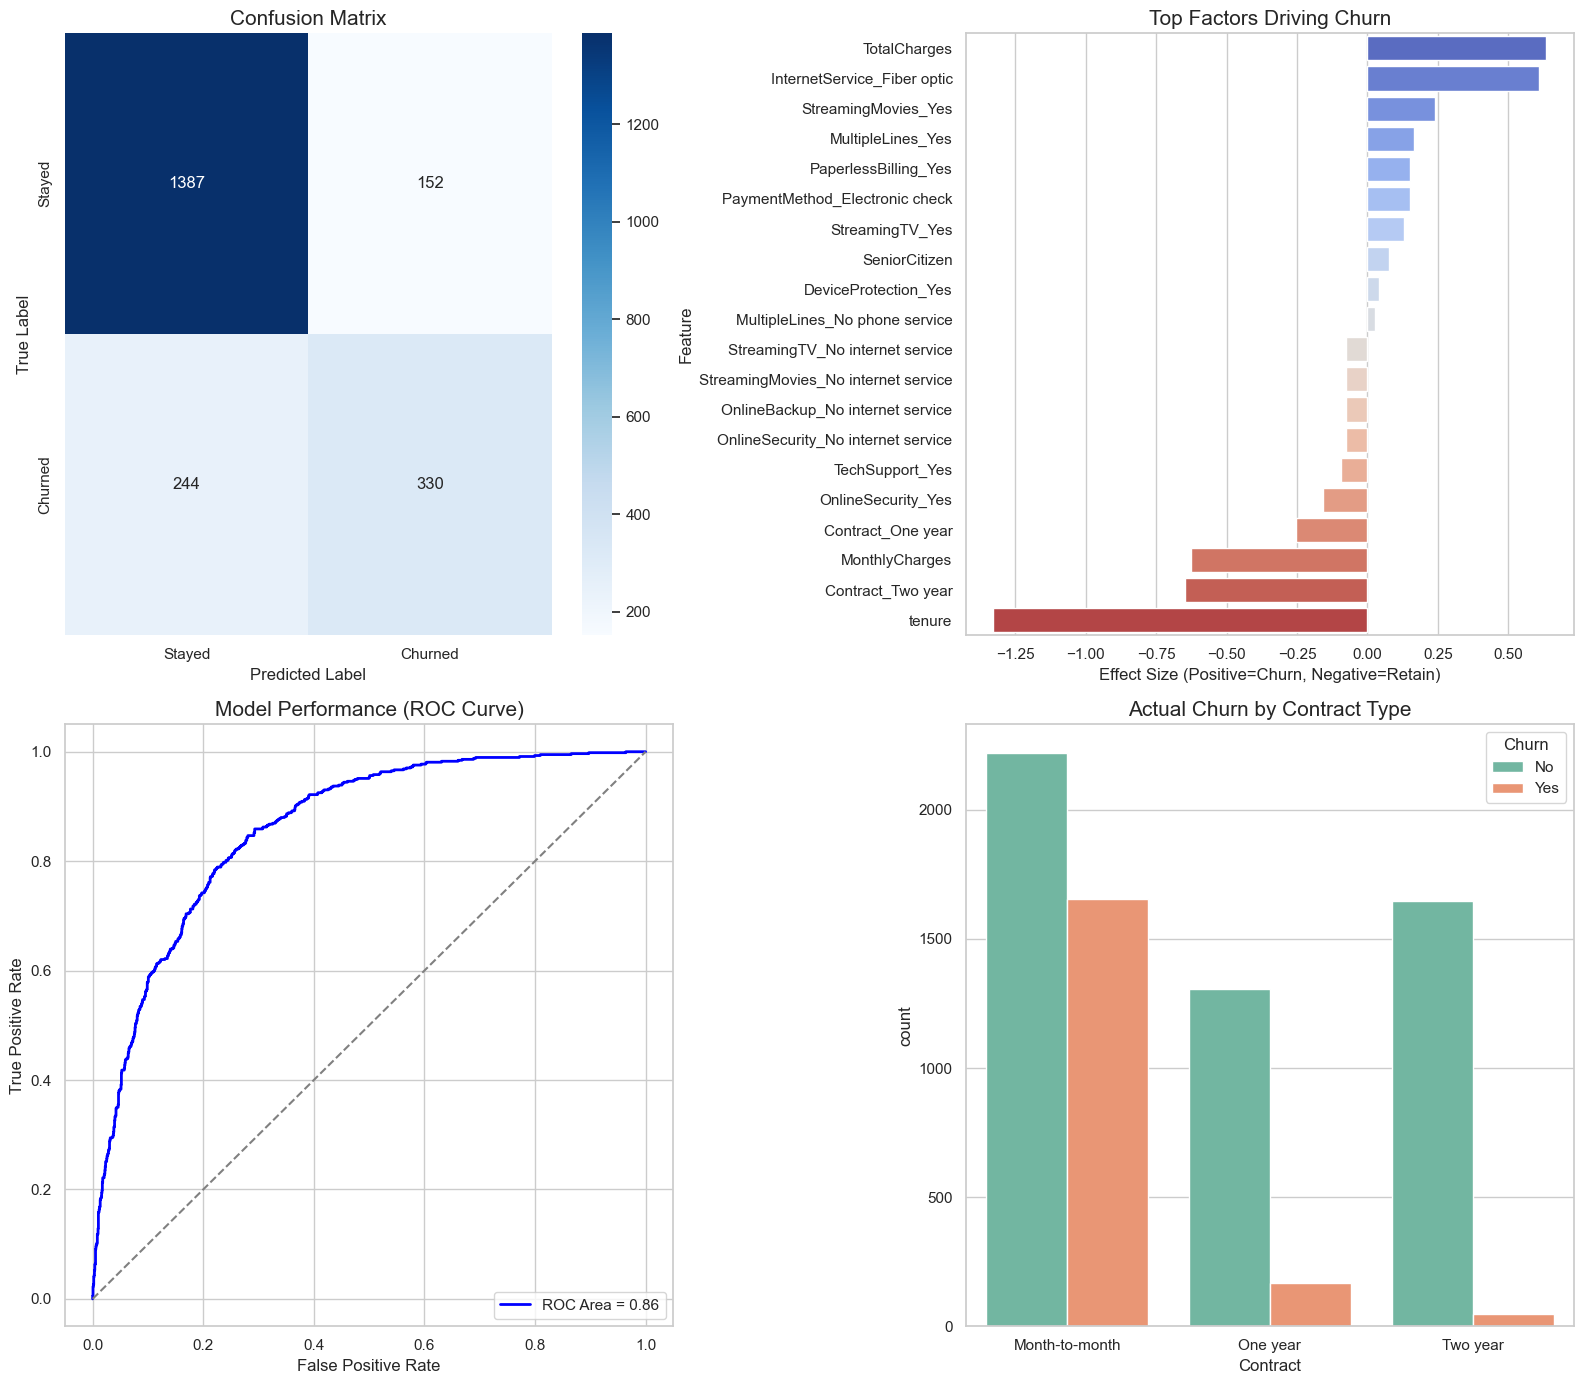

The accuracy of our model is: 0.812588736393753


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Set plotting style for Jupyter
# %matplotlib inline
sns.set(style="whitegrid")

# 1. Load the data
df = pd.read_csv(r"C:\Users\ASUS\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2. Data Cleaning
# Handle empty strings in TotalCharges and convert to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop customerID
df_ml = df.drop('customerID', axis=1)

# Encode binary target (Yes=1, No=0)
df_ml['Churn'] = df_ml['Churn'].map({'Yes': 1, 'No': 0})

# 3. Feature Engineering: One-Hot Encoding
df_ml = pd.get_dummies(df_ml, drop_first=True)

# 4. Prepare Sets
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Model Training
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 7. Model Evaluation
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

print("--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

# 8. Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Graph 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
axes[0,0].set_title('Confusion Matrix', fontsize=15)
axes[0,0].set_xlabel('Predicted Label')
axes[0,0].set_ylabel('True Label')

# Graph 2: Feature Impact (FIXED: Added hue and legend=False to remove the warning)
weights = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)
top_weights_df = pd.concat([weights.head(10), weights.tail(10)]).reset_index()
top_weights_df.columns = ['Feature', 'Coefficient']

sns.barplot(data=top_weights_df, x='Coefficient', y='Feature', hue='Feature', 
            palette='coolwarm', legend=False, ax=axes[0,1])
axes[0,1].set_title('Top Factors Driving Churn', fontsize=15)
axes[0,1].set_xlabel('Effect Size (Positive=Churn, Negative=Retain)')

# Graph 3: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[1,0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Area = {roc_auc:.2f}')
axes[1,0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1,0].set_title('Model Performance (ROC Curve)', fontsize=15)
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].legend(loc="lower right")

# Graph 4: Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2', ax=axes[1,1])
axes[1,1].set_title('Actual Churn by Contract Type', fontsize=15)

plt.tight_layout()
plt.show()
print("The accuracy of our model is:", accuracy_score(y_test, y_pred))
df.head()

In [3]:
# SAVE MODEL FILES
import pickle

# Save model
pickle.dump(lr_model, open("model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save feature columns
pickle.dump(X.columns, open("columns.pkl", "wb"))

print("Model, Scaler and Columns saved successfully!")

Model, Scaler and Columns saved successfully!
